Regression


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
#data
data = {'YearsExperience' : [1, 2, 3, 4, 5], 'Salary':[35000, 40000, 50000, 60000, 65000]}
df= pd.DataFrame(data)

In [ ]:
#Model
x = df[['YearsExperience']]
y = df['Salary']

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
print("Predict salary for a person with 7 years of expe", model.predict([[7]]))

Predict salary for a person with 7 years of expe [82000.]


c:\Users\suvam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


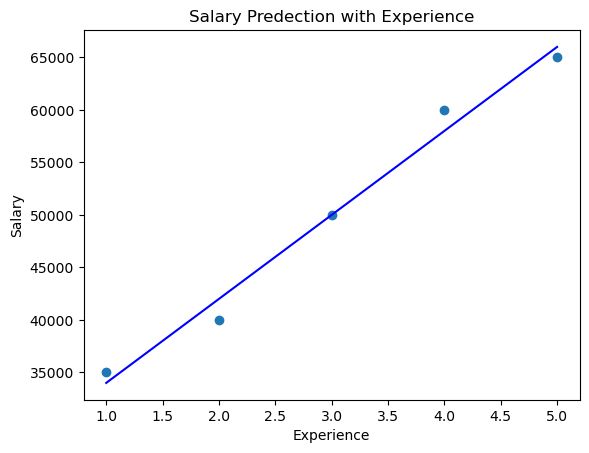

In [ ]:
#plot
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary Predection with Experience')
plt.show()

Workflow of test,train and MSE score calculation :
1. Y decomposed into y_train (comparatively bigger data) and y_test(comparatively less data or used as a sample)
2. declare dataframe -> define dataframe -> model declaration -> model fit -> calulate predicted value of y (always predicts from test sample of x) -> calculate MSE value (depends on y test, y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#load data
data1 = {'Rooms': [1,2,3,4,5], 'Area':[300, 700, 1100, 1300, 1500], 'price_in_million':[3,5,8,10,14]}
df= pd.DataFrame(data1)

In [ ]:
x= df[['Rooms', 'Area']]
y= df['price_in_million']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)
model= LinearRegression()

In [ ]:
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print("MSE", mean_squared_error(y_pred,y_test))

MSE 2.2499999999999893


In [ ]:
print("Price for n number of rooms and x sqft of areas", model.predict([[7, 2000]]))

Price for n number of rooms and x sqft of areas [20.3]


c:\Users\suvam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


c:\Users\suvam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


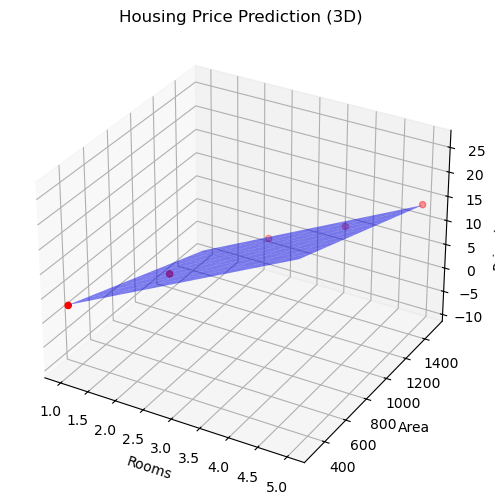

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(df['Rooms'], df['Area'], df['price_in_million'], c='red', marker='o')

# Create a meshgrid for the regression plane
x_surf, y_surf = np.meshgrid(np.linspace(df['Rooms'].min(), df['Rooms'].max(), 10),
                             np.linspace(df['Area'].min(), df['Area'].max(), 10))

# Predict the prices for the meshgrid points
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()])
z_surf = z_surf.reshape(x_surf.shape)

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.5)

ax.set_xlabel('Rooms')
ax.set_ylabel('Area')
ax.set_zlabel('Price in Million')
ax.set_title('Housing Price Prediction (3D)')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
data={'Room': [1,2,3,4,5,6], 'Price':[10,20,35,40,47,58]}
df= pd.DataFrame(data)


In [ ]:
x= df[['Room']]
y= df['Price']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.33, random_state=0)

In [ ]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred= model.predict(x_test)

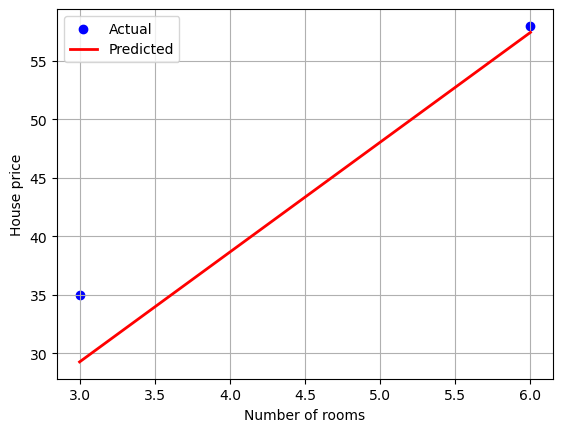

In [ ]:
plt.scatter(x_test, y_test, color='blue',label="Actual")
plt.plot(x_test, y_pred, color="red", linewidth=2, label='Predicted')
plt.xlabel("Number of rooms")
plt.ylabel("House price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2= r2_score(y_test, y_pred)
print("Evluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Evluation:
MAE: 3.15
MSE: 16.68
RMSE: 4.08
R2: 0.87
